In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Lion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
#패키지 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1차 프로젝트/신혼부부_평준화_정리.csv',encoding='cp949')

# 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   시점                    162 non-null    int64  
 1   행정구역별                 162 non-null    object 
 2   신혼부부 수 (A)            162 non-null    int64  
 3   맞벌이 비율                162 non-null    float64
 4   주택 소유율                162 non-null    float64
 5   소유부부기준 1쌍당 평균 소유주택 수  162 non-null    float64
 6   평균 출생아 수              162 non-null    float64
 7   육아휴직 사용률              162 non-null    float64
 8   신혼부부 가구수 당 종합병원       162 non-null    float64
 9   신혼부부당 세수              162 non-null    float64
 10  거처동일비율                162 non-null    float64
 11  단독주택                  162 non-null    float64
 12  아파트                   162 non-null    float64
 13  연립                    162 non-null    float64
 14  다세대                   162 non-null    float64
 15  기타주거                  1

In [ ]:
df_clean = df.dropna()
df_clean = df_clean.reset_index(drop=True)

In [ ]:
df_clean.describe()

,시점,신혼부부 수 (A),맞벌이 비율,주택 소유율,소유부부기준 1쌍당 평균 소유주택 수,평균 출생아 수,육아휴직 사용률,신혼부부 가구수 당 종합병원,신혼부부당 세수,거처동일비율,...,아파트,연립,다세대,기타주거,신혼부부 가구수 당 고등학교수,신혼부부 가구수 당 유치원수,신혼부부 가구수 당 3세대 이상 가구,혼인평균남자,혼인평균여자,신혼부부 가구수 당 응급시설
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2019.000000,72959.712418,45.992810,46.336601,1.240523,0.893268,24.574510,0.000313,76137.029393,85.813987,...,67.423268,2.258562,5.823725,4.705556,0.002302,0.008497,1.041443,32.252941,29.815033,0.000523
std,2.590468,85260.788627,6.433824,4.850444,0.116663,0.101222,5.279523,0.000156,27323.202430,3.870386,...,12.661099,2.539050,6.569630,2.112495,0.000876,0.003314,0.160185,0.503156,0.587341,0.000281
min,2015.000000,8107.000000,33.900000,34.900000,0.700000,0.600000,13.800000,0.000000,37137.721460,72.570000,...,29.170000,0.250000,0.200000,1.050000,0.001092,0.003048,0.586503,31.200000,28.500000,0.000000
25%,2017.000000,31767.000000,40.900000,42.700000,1.200000,0.830000,20.300000,0.000203,53351.139290,83.350000,...,63.450000,1.330000,1.480000,3.410000,0.001636,0.006118,0.961110,31.900000,29.400000,0.000328
50%,2019.000000,42449.000000,45.500000,46.900000,1.300000,0.900000,23.700000,0.000288,68021.406380,86.520000,...,68.210000,1.770000,3.030000,4.230000,0.002036,0.007905,1.046086,32.200000,29.800000,0.000455
75%,2021.000000,65409.000000,50.600000,49.900000,1.300000,0.950000,28.800000,0.000384,95109.681680,88.780000,...,73.210000,2.100000,7.920000,5.660000,0.002812,0.010394,1.142195,32.600000,30.200000,0.000659
max,2023.000000,387989.000000,64.700000,55.900000,1.400000,1.150000,37.000000,0.000848,156353.265500,91.300000,...,93.500000,14.320000,25.570000,13.180000,0.004841,0.017981,1.381951,33.700000,31.600000,0.001549


In [ ]:
#display 전체 해주는 코드 (생략없이)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_clean['행정구역별'] = df_clean['행정구역별'].replace('강원특별자치도', '강원도')

In [ ]:
display(df_clean)

,시점,행정구역별,신혼부부 수 (A),맞벌이 비율,주택 소유율,소유부부기준 1쌍당 평균 소유주택 수,평균 출생아 수,육아휴직 사용률,신혼부부 가구수 당 종합병원,신혼부부당 세수,거처동일비율,단독주택,아파트,연립,다세대,기타주거,신혼부부 가구수 당 고등학교수,신혼부부 가구수 당 유치원수,신혼부부 가구수 당 3세대 이상 가구,혼인평균남자,혼인평균여자,신혼부부 가구수 당 응급시설
0,2015,서울특별시,291341,47.4,36.7,1.4,0.77,22.6,0.000144,58484.16533,86.71,19.45,50.53,2.75,21.63,5.64,0.001092,0.003048,1.019101,32.4,30.1,0.000233
1,2015,부산광역시,90578,39.5,48.5,1.3,0.93,19.7,0.000265,52825.39192,86.49,15.70,69.14,1.62,8.08,5.45,0.001601,0.004449,1.245060,32.1,29.8,0.000431
2,2015,대구광역시,62811,37.6,46.7,1.2,0.96,19.1,0.000127,45579.45858,85.59,25.79,65.59,0.73,4.81,3.08,0.001465,0.006241,1.256723,31.9,29.5,0.000446
3,2015,인천광역시,89747,38.2,45.4,1.3,0.95,18.7,0.000178,41535.83841,87.43,9.82,61.82,2.01,20.81,5.55,0.001371,0.004658,1.022040,31.6,29.3,0.000234
4,2015,광주광역시,40707,41.8,51.8,1.2,1.03,18.9,0.000491,38170.06896,80.25,18.39,76.07,1.50,1.11,2.94,0.001646,0.007738,0.997912,31.9,29.3,0.000590
5,2015,대전광역시,43803,41.5,43.3,1.2,0.96,19.3,0.000205,37137.72146,85.09,24.38,67.00,1.21,4.00,3.41,0.001415,0.006118,1.028514,31.6,29.2,0.000251
6,2015,울산광역시,38537,33.9,54.9,1.2,0.99,13.8,0.000156,45678.72777,87.67,20.39,70.68,1.53,3.93,3.47,0.001453,0.005034,0.837714,31.4,29.2,0.000337
7,2015,세종특별자치시,8107,47.8,45.3,1.3,0.93,21.2,0.000000,63158.76119,86.05,11.32,85.12,0.39,0.58,2.59,0.001604,0.005304,0.819662,31.8,29.5,0.000247
8,2015,경기도,387989,40.6,41.0,1.3,0.91,19.1,0.000137,46098.10067,87.02,18.05,63.39,2.10,11.90,4.56,0.001186,0.005639,1.045573,31.8,29.4,0.000235
9,2015,강원도,38141,38.7,42.3,1.3,1.02,18.9,0.000367,41793.80887,76.19,27.82,60.90,2.33,1.44,7.51,0.003068,0.010120,1.381951,31.3,28.8,0.000734


In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ohe_origin = ohe.fit_transform(df_clean[['시점', '행정구역별']])

encoded_df = pd.DataFrame(ohe_origin, columns=ohe.get_feature_names_out(), index=df_clean.index)
encoded_df

,시점_2015,시점_2016,시점_2017,시점_2018,시점_2019,시점_2020,시점_2021,시점_2022,시점_2023,행정구역별_강원도,행정구역별_경기도,행정구역별_경상남도,행정구역별_경상북도,행정구역별_광주광역시,행정구역별_대구광역시,행정구역별_대전광역시,행정구역별_부산광역시,행정구역별_서울특별시,행정구역별_세종특별자치시,행정구역별_울산광역시,행정구역별_인천광역시,행정구역별_전라남도,행정구역별_전라북도,행정구역별_제주특별자치도,행정구역별_충청남도,행정구역별_충청북도
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final = df_clean.join(encoded_df)
df_final

,시점,행정구역별,신혼부부 수 (A),맞벌이 비율,주택 소유율,소유부부기준 1쌍당 평균 소유주택 수,평균 출생아 수,육아휴직 사용률,신혼부부 가구수 당 종합병원,신혼부부당 세수,거처동일비율,단독주택,아파트,연립,다세대,기타주거,신혼부부 가구수 당 고등학교수,신혼부부 가구수 당 유치원수,신혼부부 가구수 당 3세대 이상 가구,혼인평균남자,혼인평균여자,신혼부부 가구수 당 응급시설,시점_2015,시점_2016,시점_2017,시점_2018,시점_2019,시점_2020,시점_2021,시점_2022,시점_2023,행정구역별_강원도,행정구역별_경기도,행정구역별_경상남도,행정구역별_경상북도,행정구역별_광주광역시,행정구역별_대구광역시,행정구역별_대전광역시,행정구역별_부산광역시,행정구역별_서울특별시,행정구역별_세종특별자치시,행정구역별_울산광역시,행정구역별_인천광역시,행정구역별_전라남도,행정구역별_전라북도,행정구역별_제주특별자치도,행정구역별_충청남도,행정구역별_충청북도
0,2015,서울특별시,291341,47.4,36.7,1.4,0.77,22.6,0.000144,58484.16533,86.71,19.45,50.53,2.75,21.63,5.64,0.001092,0.003048,1.019101,32.4,30.1,0.000233,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,부산광역시,90578,39.5,48.5,1.3,0.93,19.7,0.000265,52825.39192,86.49,15.70,69.14,1.62,8.08,5.45,0.001601,0.004449,1.245060,32.1,29.8,0.000431,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,대구광역시,62811,37.6,46.7,1.2,0.96,19.1,0.000127,45579.45858,85.59,25.79,65.59,0.73,4.81,3.08,0.001465,0.006241,1.256723,31.9,29.5,0.000446,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,인천광역시,89747,38.2,45.4,1.3,0.95,18.7,0.000178,41535.83841,87.43,9.82,61.82,2.01,20.81,5.55,0.001371,0.004658,1.022040,31.6,29.3,0.000234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2015,광주광역시,40707,41.8,51.8,1.2,1.03,18.9,0.000491,38170.06896,80.25,18.39,76.07,1.50,1.11,2.94,0.001646,0.007738,0.997912,31.9,29.3,0.000590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015,대전광역시,43803,41.5,43.3,1.2,0.96,19.3,0.000205,37137.72146,85.09,24.38,67.00,1.21,4.00,3.41,0.001415,0.006118,1.028514,31.6,29.2,0.000251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015,울산광역시,38537,33.9,54.9,1.2,0.99,13.8,0.000156,45678.72777,87.67,20.39,70.68,1.53,3.93,3.47,0.001453,0.005034,0.837714,31.4,29.2,0.000337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2015,세종특별자치시,8107,47.8,45.3,1.3,0.93,21.2,0.000000,63158.76119,86.05,11.32,85.12,0.39,0.58,2.59,0.001604,0.005304,0.819662,31.8,29.5,0.000247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015,경기도,387989,40.6,41.0,1.3,0.91,19.1,0.000137,46098.10067,87.02,18.05,63.39,2.10,11.90,4.56,0.001186,0.005639,1.045573,31.8,29.4,0.000235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015,강원도,38141,38.7,42.3,1.3,1.02,18.9,0.000367,41793.80887,76.19,27.82,60.90,2.33,1.44,7.51,0.003068,0.010120,1.381951,31.3,28.8,0.000734,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#인코딩 데이터 포함 X,y 분리
df_copy = df_final.copy()
df_copy=df_copy.drop(['시점','행정구역별'],axis=1)

X = df_copy.drop('평균 출생아 수', axis=1)#종속변수제외 나머지 컬럼, 인코딩된 칼럼은 추후 join
y = df_copy['평균 출생아 수']#종속변수

print(X.shape)
print(y.shape)

(153, 45)
(153,)


In [ ]:
#train-test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#인코딩된 데이터프레임과 칼럼
encoded_df.columns
encoding_columns=encoded_df.columns

#train/test 각각 인코딩 분리
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train_copy.drop(encoding_columns, axis=1,inplace=True)
X_test_copy.drop(encoding_columns, axis=1,inplace=True)

print(X_train_copy.info())
print(X_test_copy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 94 to 102
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   신혼부부 수 (A)            122 non-null    int64  
 1   맞벌이 비율                122 non-null    float64
 2   주택 소유율                122 non-null    float64
 3   소유부부기준 1쌍당 평균 소유주택 수  122 non-null    float64
 4   육아휴직 사용률              122 non-null    float64
 5   신혼부부 가구수 당 종합병원       122 non-null    float64
 6   신혼부부당 세수              122 non-null    float64
 7   거처동일비율                122 non-null    float64
 8   단독주택                  122 non-null    float64
 9   아파트                   122 non-null    float64
 10  연립                    122 non-null    float64
 11  다세대                   122 non-null    float64
 12  기타주거                  122 non-null    float64
 13  신혼부부 가구수 당 고등학교수      122 non-null    float64
 14  신혼부부 가구수 당 유치원수       122 non-null    float64
 15  신혼부부 가구수 당 3세대 이상 가구  122 n

In [ ]:
standard_cols = ['단독주택','혼인평균남자','혼인평균여자']
robust_cols = ['신혼부부 수 (A)','맞벌이 비율','주택 소유율','소유부부기준 1쌍당 평균 소유주택 수','육아휴직 사용률','신혼부부 가구수 당 종합병원','신혼부부당 세수','거처동일비율','아파트','연립','다세대','기타주거','신혼부부 가구수 당 고등학교수','신혼부부 가구수 당 유치원수','신혼부부 가구수 당 3세대 이상 가구','신혼부부 가구수 당 응급시설']

#스케일러 객체 생성
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

#train셋의 standard 컬럼 변환
X_train_copy[standard_cols] = scaler_standard.fit_transform(X_train_copy[standard_cols])

#train셋의 robust컬럼 변환
X_train_copy[robust_cols] = scaler_robust.fit_transform(X_train_copy[robust_cols])

print("변환된 train set의 상위 5개 행 : ")
print(X_train_copy.head())

변환된 train set의 상위 5개 행 : 
    신혼부부 수 (A)    맞벌이 비율    주택 소유율  소유부부기준 1쌍당 평균 소유주택 수  육아휴직 사용률  \
94   -0.240792  0.133705 -0.038710                   0.0  0.461538   
68    5.678761  0.835655 -1.200000                   1.0  0.402367   
22    0.025869 -0.412256 -0.490323                  -1.0 -0.461538   
45    0.506054 -0.857939  0.193548                  -3.0 -0.615385   
76    9.359440  0.022284 -0.580645                   0.0 -0.023669   

    신혼부부 가구수 당 종합병원  신혼부부당 세수    거처동일비율      단독주택       아파트      연립       다세대  \
94         0.708092  0.255590 -0.387817  0.455433  0.112746  0.2250 -0.218013   
68        -0.533913  0.652764  0.491371 -0.676175 -1.563482  0.5000  2.928548   
22        -0.410505 -0.694399 -0.152284  0.635151 -0.123722 -0.6375  0.101030   
45        -0.542251 -0.239771 -0.387817  0.452954 -0.113744  0.0875  0.000000   
76        -0.662201 -0.019892  0.395939 -0.713358 -0.086805  0.0000  1.136590   

        기타주거  신혼부부 가구수 당 고등학교수  신혼부부 가구수 당 유치원수  신혼부부 가구수 당 3세대 이상

In [ ]:
#Test 셋 변환
X_test_copy[standard_cols]=scaler_standard.transform(X_test_copy[standard_cols])
X_test_copy[robust_cols]=scaler_robust.transform(X_test_copy[robust_cols])

print("\n 변환된 test셋 상위 5행")
print(X_test_copy.head())


 변환된 test셋 상위 5행
     신혼부부 수 (A)    맞벌이 비율    주택 소유율  소유부부기준 1쌍당 평균 소유주택 수  육아휴직 사용률  \
84    -0.710981 -0.055710 -0.451613                   1.0  0.461538   
86     0.775095  0.155989 -0.451613                   0.0  0.284024   
97    -0.240286  0.033426  0.425806                   0.0 -0.059172   
115   -0.244808  0.011142  0.903226                   0.0  0.201183   
29     0.043035 -0.824513  0.038710                   0.0 -0.686391   

     신혼부부 가구수 당 종합병원  신혼부부당 세수    거처동일비율      단독주택       아파트       연립  \
84          0.280572  0.416163 -0.763452  2.079097 -3.921177  12.7500   
86          0.445159  0.553637  0.822335 -1.219049  0.811175  -0.6750   
97          0.220866  0.446658 -0.907614  0.811152 -0.092791  -0.0250   
115         2.344922  1.038405 -1.327919  0.833462 -0.305313   0.4625   
29         -0.173612 -0.588843 -1.472081  1.304448 -0.520828   0.1750   

          다세대      기타주거  신혼부부 가구수 당 고등학교수  신혼부부 가구수 당 유치원수  \
84   1.568627  1.481243         -0.299978        -0.20

In [ ]:
#display 전체 해주는 코드 (생략없이)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
#인코딩 데이터와 합침
X_train_processed = pd.concat([X_train_copy,encoded_df.loc[X_train.index]], axis=1)
X_test_processed = pd.concat([X_test_copy,encoded_df.loc[X_test.index]], axis=1)
print(X_train_processed.shape,X_test_processed.shape)


(122, 45) (31, 45)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. 상수항 추가 (절편)
data = add_constant(X_train_processed)

# 2. VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# 3. 결과 확인
print(vif_data)

                 Feature           VIF
0                  const  0.000000e+00
1             신혼부부 수 (A)  3.347211e+02
2                 맞벌이 비율  4.275598e+02
3                 주택 소유율  1.901481e+01
4   소유부부기준 1쌍당 평균 소유주택 수  8.196473e+00
5               육아휴직 사용률  1.288232e+02
6        신혼부부 가구수 당 종합병원  8.071198e+01
7               신혼부부당 세수  6.823648e+01
8                 거처동일비율  1.049462e+02
9                   단독주택  2.334058e+06
10                   아파트  5.591787e+06
11                    연립  2.157701e+05
12                   다세대  1.548907e+06
13                  기타주거  1.720739e+05
14      신혼부부 가구수 당 고등학교수  8.263798e+02
15       신혼부부 가구수 당 유치원수  7.278037e+02
16  신혼부부 가구수 당 3세대 이상 가구  4.624429e+01
17                혼인평균남자  1.642138e+02
18                혼인평균여자  3.638786e+02
19       신혼부부 가구수 당 응급시설  5.495092e+01
20               시점_2015           inf
21               시점_2016           inf
22               시점_2017           inf
23               시점_2018           inf
24               시점_2019 

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
X_train_processed = X_train_processed.drop(['혼인평균남자','육아휴직 사용률','신혼부부 가구수 당 고등학교수'], axis=1)
X_test_processed = X_test_processed.drop(['혼인평균남자','육아휴직 사용률','신혼부부 가구수 당 고등학교수'], axis=1)
##1차 피쳐 셀렉션

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. 상수항 추가 (절편)
data = add_constant(X_train_processed)

# 2. VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# 3. 결과 확인
print(vif_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 Feature           VIF
0                  const  0.000000e+00
1             신혼부부 수 (A)  3.329532e+02
2                 맞벌이 비율  3.404093e+02
3                 주택 소유율  1.873251e+01
4   소유부부기준 1쌍당 평균 소유주택 수  8.180806e+00
5        신혼부부 가구수 당 종합병원  5.610824e+01
6               신혼부부당 세수  4.204184e+01
7                 거처동일비율  9.766186e+01
8                   단독주택  2.280300e+06
9                    아파트  5.463297e+06
10                    연립  2.107629e+05
11                   다세대  1.514244e+06
12                  기타주거  1.681548e+05
13       신혼부부 가구수 당 유치원수  1.386114e+02
14  신혼부부 가구수 당 3세대 이상 가구  4.269365e+01
15                혼인평균여자  2.723332e+02
16       신혼부부 가구수 당 응급시설  5.137750e+01
17               시점_2015           inf
18               시점_2016           inf
19               시점_2017           inf
20               시점_2018           inf
21               시점_2019           inf
22               시점_2020           inf
23               시점_2021           inf
24               시점_2022 

#NN 모델

In [ ]:
#NN모델링
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam,Adagrad,SGD,Nadam
from tensorflow.keras import regularizers

model = models.Sequential()

# 은닉층 (+입력층)
#model.add(layers.Dense(128, input_dim=X_train_processed.shape[1], activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.001)))#입력층이자, 첫 번째 은닉층 설정
#model.add(layers.Dense(첫 번째 은닉층 노드수 32개, input_dim=X_processed의 속성수, activation = 활성화 함수 종류, 정규화))

model.add(layers.Dense(32, input_dim=X_train_processed.shape[1], activation = 'sigmoid'))#입력층이자, 첫 번째 은닉층 설정
#model.add(layers.Dense(첫 번째 은닉층 노드수 32개, input_dim=X_processed의 속성수, activation = 활성화 함수 종류))
model.add(layers.Dense(16, activation = 'relu'))#두 번째 은닉층
model.add(layers.Dense(8, activation = 'relu'))#세 번째 은닉층
model.add(layers.Dense(1))# 출력층, 회귀모델에서는 출력에 활성화 함수 사용안함

#컴파일 설정0
model.compile(optimizer=Adam(learning_rate=0.01), loss = 'mse', metrics=['mse'])
#model.compile(optimizer=최적화방법(학습률), loss = 손실함수설정 , metrics=모델평가지표 설정)

model.summary()#구조 요약해서 출력


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#학습10번동안 개선없으면 종료
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_processed, y_train, validation_data=(X_test_processed, y_test), epochs=100, batch_size=16,callbacks=[early_stop])#모델학습
#history = model.fit(X_train, y_train, vㅃalidation_data=(X_test,"" y_test), epochs=학습횟수(50~100), batch_size=소규모라 16or8사용예정,callbacks=[early_stop])

from sklearn.metrics import r2_score

y_pred = model.predict(X_test_processed)# 모델로 테스트 데이터 예측

r2 = r2_score(y_test, y_pred)# R^2 계산

test_loss, test_MSE = model.evaluate(X_test_processed, y_test)#손실함수,MSE계산
print(f'Test  MSE: {test_MSE:.4f}')
print(f'Test R^2: {r2:.4f}')


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.6370 - mse: 0.6370 - val_loss: 0.0937 - val_mse: 0.0937
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.6146e-04 - mse: 9.6146e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.2282

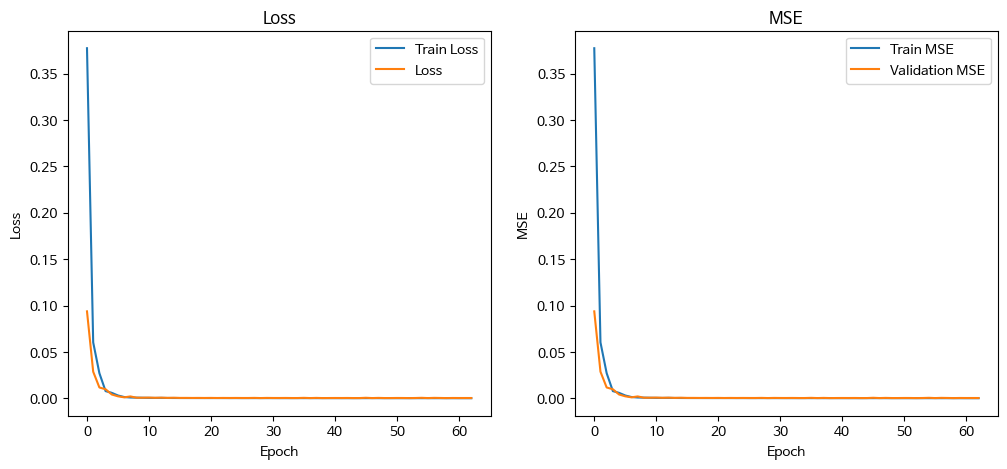

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_name = 'NanumBarunGothic'

plt.rc('font', family=font_name)

# 한글 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 학습 과정 시각화 (loss, mse)
plt.figure(figsize=(12,5))

#loss 시각화
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MSE 시각화
plt.subplot(1,2,2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()


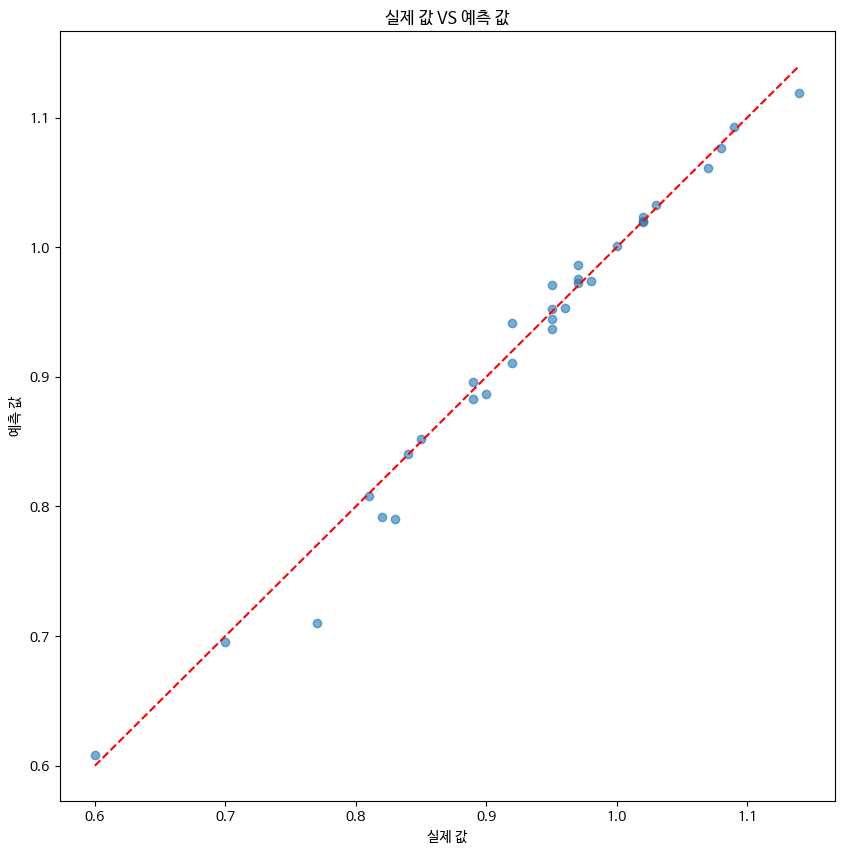

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_name = 'NanumBarunGothic'

plt.rc('font', family=font_name)

# 한글 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 실제값과 예측값 비교
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 완벽 예측 선
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 VS 예측 값')
plt.show()


  0%|          | 0/31 [00:00<?, ?it/s]

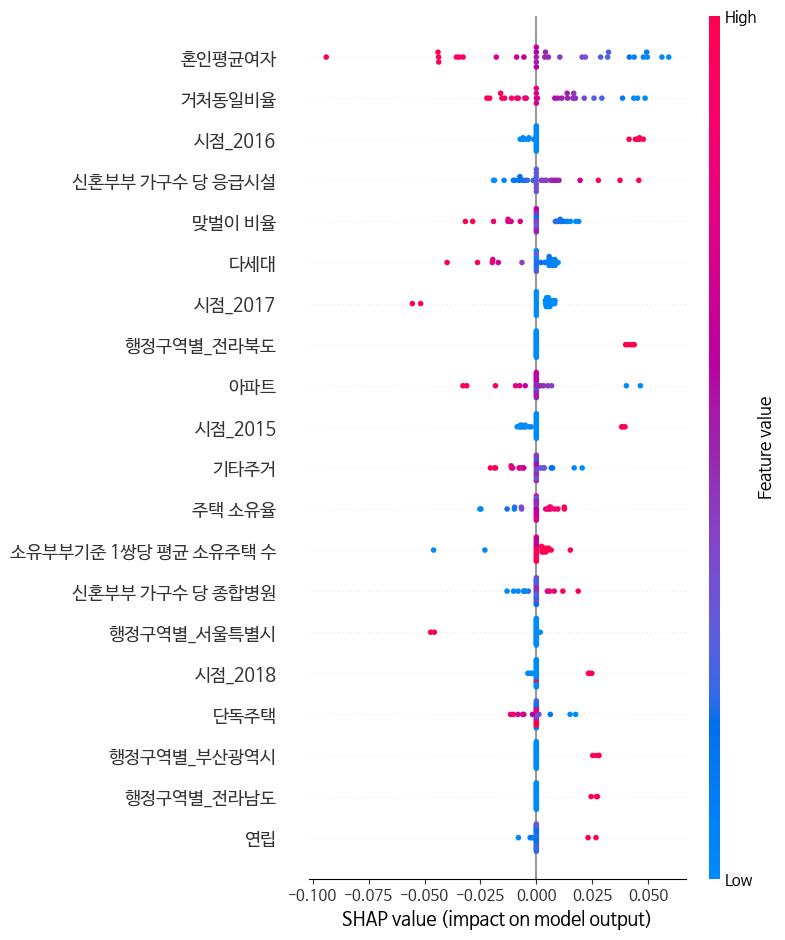

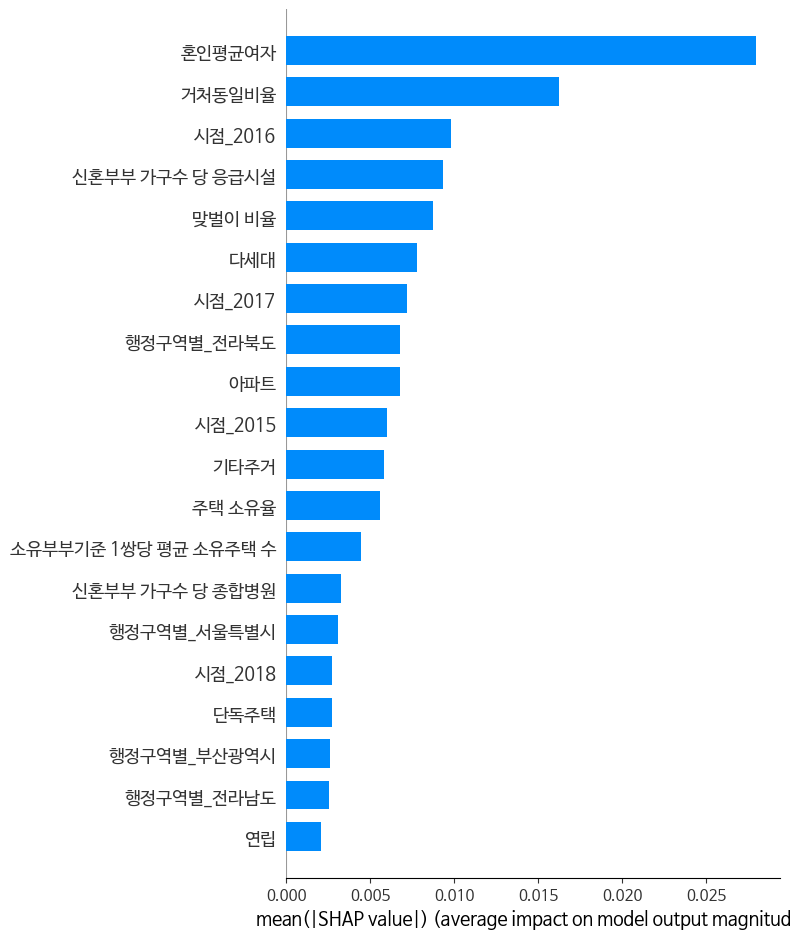

In [ ]:
#SHAP으로 feature importance 확인하기
import shap

#explainer = shap.DeepExplainer(적용한 모델(여기서는 NN), 배경 데이터)
explainer = shap.KernelExplainer(model, X_train_processed)

# SHAP 값 계산 (테스트 데이터에 대해 각 특성이 예측에 얼마나 기여했는지)
shap_values = explainer.shap_values(X_test_processed.values)
shap_values = shap_values.squeeze()  # 마지막 차원 제거(회귀문제라 생김)없으면 오류남....
#squeeze() : 1인 차원을 제거
#  시각화
shap.summary_plot(shap_values, X_test_processed, feature_names=X_train_processed.columns)#각 데이터마다 shap값
shap.summary_plot(shap_values, X_test_processed, feature_names=X_train_processed.columns, plot_type="bar")#평균 중요도

샤플리 값의 원리
SHAP의 핵심인 샤플리 값은 협력 게임에서 각 플레이어의 공헌도를 공정하게 분배하기 위해 고안. 모든 가능한 조합(coalition)에서 특정 플레이어가 추가되었을 때 얻게 되는 이익의 평균을 계산하여 그 플레이어의 기여도를 측정.

SHAP는 이 원리를 머신러닝 모델에 적용.

**'플레이어'**는 **'피처'**

**'이익'**은 **'모델의 예측값'**

즉, 특정 피처가 없을 때와 있을 때의 예측값 변화를 모든 가능한 피처 조합에 대해 평균 내어, 그 피처의 기여도(SHAP 값)를 계산. 이 기여도는 모델의 예측값(f(x))과 기준값(E[f(x)] 또는 베이스라인) 사이의 차이를 설명.

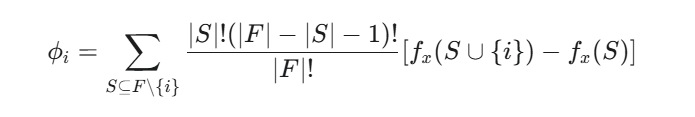